MOBILOS

1) Webscrape mobiltelefonernes navne og priser fra Komplett.dk
https://www.komplett.dk/category/21064/mobil/mobiltelefoner

2) Plot gennemsnitpriserne på Samsung og Iphone i et bar-graf eller linjediagram

3) Webscrape mobiltelefonernes navne og priser fra Telia.dk
https://www.telia.dk/privat/webshop/mobiler/?page=4

3.a) Sammenlign mobilernes priser fra begge butikker og plot dem.


In [1]:
import bs4
import requests
import re
import json

In [ ]:
# --------------------------------------------------------------
# 1) Webscrape mobiltelefonernes navne og priser fra Komplett.dk
#    https://www.komplett.dk/category/21064/mobil/mobiltelefoner
# --------------------------------------------------------------

# URL (Bemærk tilføjelse af hits=1000 viser max antal telefoner)
url_komplett = 'https://www.komplett.dk/category/21064/mobil/mobiltelefoner?nlevel=10444%C2%A721064&hits=1000'

# Funktion til at gemme en hjemmeside
def request_url(url, file):
    
    # Foretag request på url
    r = requests.get(url)

    # Returnér HTTPError hvis request fejler. None = OK
    r.raise_for_status()

    # Indlæser indholdet fra url og gør det håndtérbart
    soup = bs4.BeautifulSoup(r.text, 'html.parser')

    # Skriv indholdet til en html fil
    with open((file + '.html'), 'w') as file:
        file.write(str(soup))

# Gem indholdet i en html fil
request_url(url_komplett, 'komplett')

In [2]:
# Indlæs indhold fra html
with open('./komplett.html') as f:
    webscraped_content = f.read()

# Gør indholdet håndtérbart vha. BeautifulSoup
soup = bs4.BeautifulSoup(webscraped_content)

# Find alle produkter
#all_products = soup.findAll('a', {'class': 'product-link image-container'})
all_products = soup.select('div[class=text-content] > h2')

# Find alle priser
all_prices = soup.select('span.product-price-now')

# Opret en liste af tupler indholdende alle produkter med priser (Bemærk brug af regex på pris)
products_komplett = []

for product, price in zip(all_products, all_prices):
    products_komplett.append((product.text, int(re.sub('[.,-]', '', price.text))))

# Print sidens titel og antallet af fundne produkter
print('')
print(soup.title.string)
print('-----------------------------------------------------')
print('Antal produkter fra søgning:', len(all_products))
print('-----------------------------------------------------')

# Print alle produkter med priser
for item in sorted(products_komplett):
    print(item)
    


Mobiltelefoner - Mobil - Komplett.dk
-----------------------------------------------------
Antal produkter fra søgning: 237
-----------------------------------------------------
('Asus Zenfone 8 8+128GB 5G (sort)', 5199)
('Asus Zenfone 8 8+256GB (sort)', 5699)
('Cat B40 4G (sort)', 589)
('Cat S42H+ 32GB (sort)', 1999)
('Cat S62 Pro 128GB (sort)', 5290)
('Galaxy A03 64GB (black)', 1249)
('Galaxy A03 64GB (blue)', 1249)
('Galaxy A03 64GB (red)', 1249)
('Galaxy A13 64GB (black)', 1499)
('Galaxy A13 64GB (light blue)', 1499)
('Galaxy A13 64GB (white)', 1499)
('Galaxy A22 5G 4+64GB (grå)', 1699)
('Galaxy A22 5G 4+64GB (hvid)', 1699)
('Galaxy A22 5G 4+64GB (lys lilla)', 1699)
('Galaxy A33 5G 128GB (awesome black)', 2799)
('Galaxy A33 5G 128GB (awesome blue)', 2799)
('Galaxy A33 5G 128GB (awesome peach)', 2799)
('Galaxy A33 5G 128GB (awesome white)', 2799)
('Galaxy A53 5G 128GB (awesome black)', 3399)
('Galaxy A53 5G 128GB (awesome blue)', 3399)
('Galaxy A53 5G 128GB (awesome peach)', 3399)


In [3]:
# Funktion der returnerer en filtreret liste ud fra keyword vha. regex
# arg1 = navn, arg2 = liste, [valgfri] arg3 = index for navnesøgning
def filterByName(arg1, arg2, arg3=0):
    filtered_list = []
    for item in arg2:
        if re.compile(arg1).search(item[arg3]):
            filtered_list.append(item)
            
    return filtered_list

# Filtrér ud fra produkt
filter_samsung_komplett = filterByName('Samsung', products_komplett)
filter_iphone_komplett = filterByName('iPhone', products_komplett)

# Print alle produkter med priser
print('\nAntal Samsung produkter:', len(filter_samsung_komplett))
print('-----------------------------------------------------')
for item in filter_samsung_komplett:
    print(item)

# Print alle produkter med priser
print('\nAntal iPhone produkter:', len(filter_iphone_komplett))
print('-----------------------------------------------------')
for item in filter_iphone_komplett:
    print(item)


Antal Samsung produkter: 46
-----------------------------------------------------
('Samsung Galaxy XCover 5 64 GB Enterprise Edition', 2199)
('Samsung Galaxy A52s 5G 128GB (white)', 3399)
('Samsung Galaxy A52s 5G 128GB (violet)', 3399)
('Samsung Galaxy A32 5G 64GB (sort)', 2099)
('Samsung Galaxy S21 Plus 5G 128GB (phantom violet)', 6999)
('Samsung Galaxy Xcover Pro 64 GB (sort)', 3473)
('Samsung Galaxy A52s 5G 128GB (black)', 3399)
('Samsung Galaxy S20 FE 5G 128GB (grøn)', 5199)
('Samsung Galaxy S21 5G 128GB (phantom white)', 5999)
('Samsung Galaxy S21 5G 128GB (phantom gray)', 5999)
('Samsung Galaxy A32 5G 64GB (hvid)', 2099)
('Samsung Galaxy A22 4G (LTE) 64GB Hvid', 1599)
('Samsung Galaxy S22 Plus 128GB (sort)', 8299)
('Samsung Galaxy A52s 5G 128GB (black)', 3399)
('Samsung Galaxy A52s 5G 128GB (mint)', 3399)
('Samsung Galaxy Z Fold3 5G 256GB (phantom black)', 14199)
('Samsung Galaxy Z Flip3 5G 128GB (cream)', 8199)
('Samsung Galaxy A22 4G (LTE) 64GB Sort', 1599)
('Samsung Galaxy S2

In [4]:
# Funktion til at udregn gennemsnitsprisen
# arg1 = navn, [valgfri] arg2 = index for pris
def avg_price(arg1, arg2=1):
    avg = 0;
    for a in arg1:
        avg += a[arg2]
    return avg/len(arg1)
        
avg_samsung_komplett = avg_price(filter_samsung_komplett)
avg_iphone_komplett = avg_price(filter_iphone_komplett)

# Print gennemsnitsprisen
print('\nGennemsnitspriser - Komplett.dk:')
print('-----------------------------------------------------')
print('Samsung:', avg_samsung_komplett)
print('iPhone:', avg_iphone_komplett)


Gennemsnitspriser - Komplett.dk:
-----------------------------------------------------
Samsung: 7324.521739130435
iPhone: 7982.961832061069


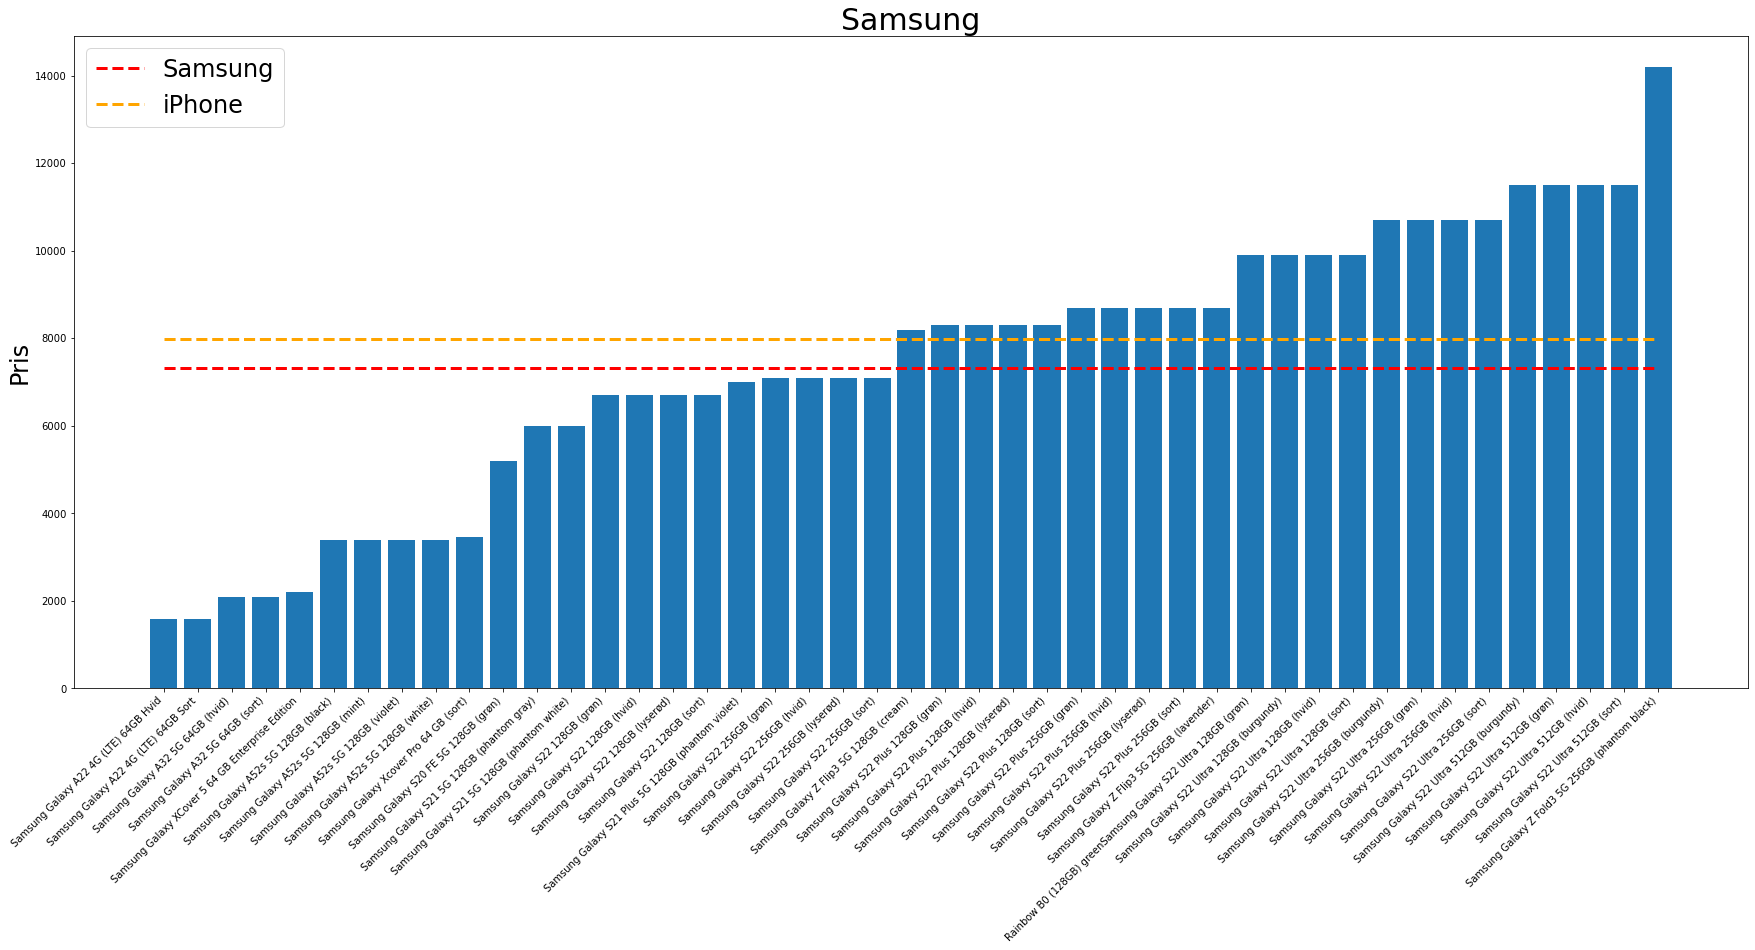

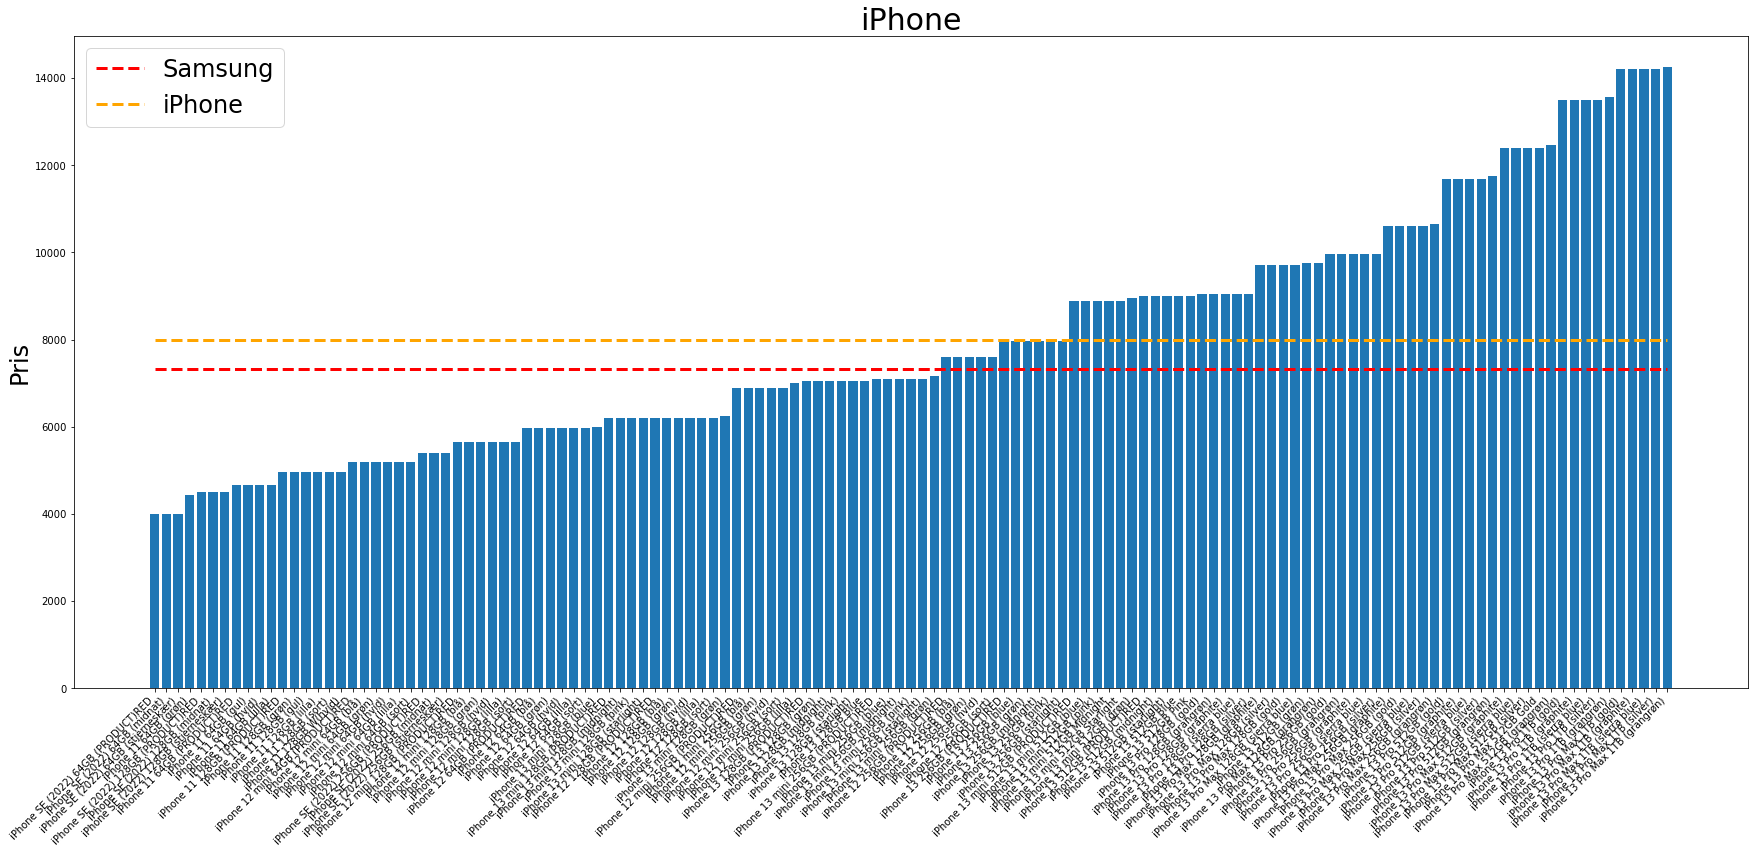

In [6]:
# --------------------------------------------------------------------------------
# 2) Plot gennemsnitpriserne på Samsung og Iphone i et bar-graf eller linjediagram
# --------------------------------------------------------------------------------

import matplotlib.pyplot as plt
import numpy as np

# Funktion til at tegne et bar plot med gennemsnitspriser
def plot_products(arg1, arg2):

    # Opret figur
    fig, ax = plt.subplots(figsize=(30, 12))

    # Sortér efter pris
    arg1.sort(key=lambda x: (x[1], x[0]))

    # List indhold for akse variablerne for x og y
    x = []
    y = []

    for item in arg1:
        x.append(item[0])
        y.append(item[1])

    # Opret lister med samme værdi for gennemsnittet vha. numpy
    y_mean_samsung = [np.mean(avg_samsung_komplett)]*len(x)
    y_mean_iphone = [np.mean(avg_iphone_komplett)]*len(x)
    
    # Plot gennemsnitslinierne
    plt.plot(x, y_mean_samsung, label='Samsung', linestyle='--', color='red', linewidth=3)
    plt.plot(x, y_mean_iphone, label='iPhone', linestyle='--', color='orange', linewidth=3)
    
    # Indsæt beskrivelse af 
    plt.legend(loc='upper left', prop={'size': 24})
    
    # Bar plot
    plt.bar(x, y)
    
    # Tekst formatering
    plt.xticks(rotation=45, horizontalalignment='right', fontweight='light')
    plt.title(arg2, fontsize=30)
    plt.ylabel("Pris", fontsize=24)

    # Returnér
    return plt.show()

# Vis plots
plot_products(filter_samsung_komplett, 'Samsung')
plot_products(filter_iphone_komplett, 'iPhone')

In [ ]:
# -----------------------------------------------------------
# 3) Webscrape mobiltelefonernes navne og priser fra Telia.dk 
#    https://www.telia.dk/privat/webshop/mobiler/?page=4
# -----------------------------------------------------------

# URL (Bemærk tilføjelse af ?page=4 viser max antal telefoner)
url_telia = 'https://www.telia.dk/privat/webshop/mobiler/?page=4'

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

profile = webdriver.FirefoxProfile()
profile.set_preference("general.useragent.override", "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:81.0) Gecko/20100101 Firefox/81.0")

# None GUI (Headless)
#options = Options()
#options.headless = True
#browser = webdriver.Firefox(options=options, executable_path=r'/tmp/geckodriver')

# Start GUI vha. XLaunch
browser = webdriver.Firefox()

# Hent side fra url
browser.get(url_telia)

# Pause
browser.implicitly_wait(2)

# Nej til cookies
button = browser.find_element_by_id('declineButton')
button.click()

# Lokalisér produkt kort indeholdende navne og priser
get_brands = browser.find_elements_by_css_selector('p.cm-c-product-card-simple__brand')
get_titles = browser.find_elements_by_css_selector('p.cm-c-product-card-simple__title')
get_descs = browser.find_elements_by_css_selector('div.cm-c-product-card-simple__desc')

# Gem resultatet i læsbar form
brands = [b.text for b in get_brands]
titles = [b.text for b in get_titles]
descs = [b.text for b in get_descs]

products_telia = []
for b, t, d in zip(brands, titles, descs):
    products_telia.append((b, t, d))
    
# Skriv indholdet til en json fil
with open('telia.json', 'w') as f:
    json.dump(products_telia, f)

In [7]:
# Indlæs indhold fra json
with open('telia.json') as f:
   all_products_telia = [tuple(x) for x in json.load(f)]

# Print info og antallet af fundne produkter
print('\nMobiltelefoner - Mobil - Telia.dk')
print('-----------------------------------------------------')
print('Antal produkter fra søgning:', len(all_products_telia))
print('-----------------------------------------------------')

for item in sorted(all_products_telia):
    print(item)


Mobiltelefoner - Mobil - Telia.dk
-----------------------------------------------------
Antal produkter fra søgning: 45
-----------------------------------------------------
('APPLE', 'IPHONE 11', 'Mindstepris 5.251,50 kr. med ONE abn.')
('APPLE', 'IPHONE 12', 'Mindstepris 6.331,50 kr. med ONE abn.')
('APPLE', 'IPHONE 12 MINI', 'Mindstepris 5.611,50 kr. med ONE abn.')
('APPLE', 'IPHONE 12 PRO MAX', 'Mindstepris 10.291,50 kr. med ONE abn.')
('APPLE', 'IPHONE 13', 'Mindstepris 7.051,50 kr. med ONE abn.')
('APPLE', 'IPHONE 13 MINI', 'Mindstepris 6.331,50 kr. med ONE abn.')
('APPLE', 'IPHONE 13 PRO', 'Mindstepris 8.671,50 kr. med ONE abn.')
('APPLE', 'IPHONE 13 PRO MAX', 'Mindstepris 9.931,50 kr. med ONE abn.')
('APPLE', 'IPHONE SE 2022', 'Mindstepris 4.711,50 kr. med ONE abn.')
('MOTOROLA', 'EDGE 20', 'Mindstepris 4.495,50 kr. med ONE abn.')
('MOTOROLA', 'EDGE 20 LITE', 'Mindstepris 3.775,50 kr. med ONE abn.')
('MOTOROLA', 'EDGE 30 PRO', 'Mindstepris 6.511,50 kr. med ONE abn.')
('MOTOROL

In [8]:
# Erstat beskrivelsen så den kun indholder prisen i helt tal
products_telia = []

for item in all_products_telia:
    
    # Lister pris vha. regex - returnérer: ['4.650']
    tmp = re.findall(r'[-+]?(?:\d*\d+\.\d+)', item[2])
    
    # Skriver indholdet fra listen til en string - returnérer: 4.650
    tmp = ''.join(str(e) for e in tmp)
    
    # Fjerner punktum (dot) - returnérer: 4650
    tmp = re.sub('[.]', '', tmp)
    
    # Findes pris?
    if (tmp != ''):
        
        # Tilføj til listen
        products_telia.append((item[0], item[1], int(tmp)))

# Print alle produkter med priser    
for item in sorted(products_telia):
    print(item)

('APPLE', 'IPHONE 11', 5251)
('APPLE', 'IPHONE 12', 6331)
('APPLE', 'IPHONE 12 MINI', 5611)
('APPLE', 'IPHONE 12 PRO MAX', 10291)
('APPLE', 'IPHONE 13', 7051)
('APPLE', 'IPHONE 13 MINI', 6331)
('APPLE', 'IPHONE 13 PRO', 8671)
('APPLE', 'IPHONE 13 PRO MAX', 9931)
('APPLE', 'IPHONE SE 2022', 4711)
('MOTOROLA', 'EDGE 20', 4495)
('MOTOROLA', 'EDGE 20 LITE', 3775)
('MOTOROLA', 'EDGE 30 PRO', 6511)
('MOTOROLA', 'MOTO E40', 2150)
('MOTOROLA', 'MOTO G100', 3451)
('NOKIA', '2720 SENIOR', 1610)
('NOKIA', '5.4', 2551)
('NOKIA', '800 TOUGH', 1510)
('NOKIA', 'X20', 3991)
('NOKIA', 'XR20', 4675)
('ONEPLUS', '10 PRO 5G', 8455)
('ONEPLUS', '9 PRO (8GB RAM)', 6151)
('ONEPLUS', 'NORD 2 5G', 3991)
('ONEPLUS', 'NORD CE 2 5G', 2950)
('SAMSUNG', 'GALAXY A32 5G', 2731)
('SAMSUNG', 'GALAXY A52S 5G', 2950)
('SAMSUNG', 'GALAXY A53 5G', 4135)
('SAMSUNG', 'GALAXY S20 FE', 5215)
('SAMSUNG', 'GALAXY S20 FE 5G', 5935)
('SAMSUNG', 'GALAXY S21 5G', 4351)
('SAMSUNG', 'GALAXY S21 FE 5G', 4650)
('SAMSUNG', 'GALAXY S21 PL

In [14]:
# Filtrér ud fra produkt
filter_samsung_telia = filterByName('GALAXY', products_telia, 1)
filter_iphone_telia = filterByName('IPHONE', products_telia, 1)

# Print alle produkter med priser
print('\nAntal Samsung produkter:', len(filter_samsung_telia))
print('-----------------------------------------------------')
for item in sorted(filter_samsung_telia):
    print(item)

# Print alle produkter med priser
print('\nAntal iPhone produkter:', len(filter_iphone_telia))
print('-----------------------------------------------------')
for item in sorted(filter_iphone_telia):
    print(item)


Antal Samsung produkter: 14
-----------------------------------------------------
('SAMSUNG', 'GALAXY A32 5G', 2731)
('SAMSUNG', 'GALAXY A52S 5G', 2950)
('SAMSUNG', 'GALAXY A53 5G', 4135)
('SAMSUNG', 'GALAXY S20 FE', 5215)
('SAMSUNG', 'GALAXY S20 FE 5G', 5935)
('SAMSUNG', 'GALAXY S21 5G', 4351)
('SAMSUNG', 'GALAXY S21 FE 5G', 4650)
('SAMSUNG', 'GALAXY S21 PLUS 5G', 5791)
('SAMSUNG', 'GALAXY S22 5G', 7015)
('SAMSUNG', 'GALAXY S22 ULTRA 5G', 9895)
('SAMSUNG', 'GALAXY S22 ULTRA 5G (12GB RAM)', 10615)
('SAMSUNG', 'GALAXY S22+ 5G', 8455)
('SAMSUNG', 'GALAXY Z FLIP3 5G', 5647)
('SAMSUNG', 'GALAXY Z FOLD3 5G', 13855)

Antal iPhone produkter: 9
-----------------------------------------------------
('APPLE', 'IPHONE 11', 5251)
('APPLE', 'IPHONE 12', 6331)
('APPLE', 'IPHONE 12 MINI', 5611)
('APPLE', 'IPHONE 12 PRO MAX', 10291)
('APPLE', 'IPHONE 13', 7051)
('APPLE', 'IPHONE 13 MINI', 6331)
('APPLE', 'IPHONE 13 PRO', 8671)
('APPLE', 'IPHONE 13 PRO MAX', 9931)
('APPLE', 'IPHONE SE 2022', 4711)


In [15]:
avg_samsung_telia = avg_price(filter_samsung_telia, 2)
avg_iphone_telia = avg_price(filter_iphone_telia, 2)

print('Gennemsnitspriser - Telia.dk:')
print('-----------------------------------------------------')
print('Samsung:', avg_samsung_telia)
print('iPhone:', avg_iphone_telia)

Gennemsnitspriser - Telia.dk:
-----------------------------------------------------
Samsung: 6517.142857142857
iPhone: 7131.0


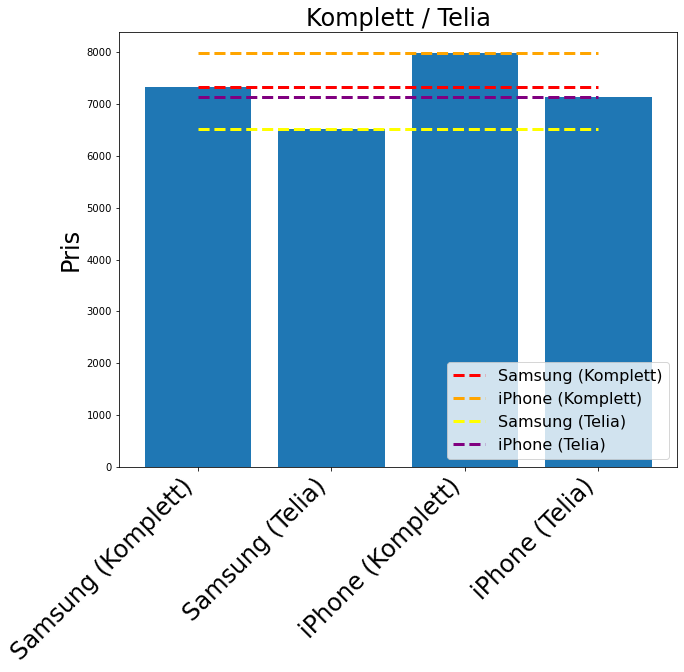

In [13]:
# ----------------------------------------------------------------
# 3.a) Sammenlign mobilernes priser fra begge butikker og plot dem
# ----------------------------------------------------------------

# Opret figur
fig, ax = plt.subplots(figsize=(10, 8))

# List indhold for akse variablerne for x og y
x = ['Samsung (Komplett)', 'Samsung (Telia)', 'iPhone (Komplett)', 'iPhone (Telia)']
y = [avg_samsung_komplett, avg_samsung_telia, avg_iphone_komplett, avg_iphone_telia]

# Opret lister med samme værdi for gennemsnittet vha. numpy
y_mean_samsung_komplett = [np.mean(avg_samsung_komplett)]*len(x)
y_mean_iphone_komplett = [np.mean(avg_iphone_komplett)]*len(x)
y_mean_samsung_telia = [np.mean(avg_samsung_telia)]*len(x)
y_mean_iphone_telia = [np.mean(avg_iphone_telia)]*len(x)

# Plot gennemsnitslinierne
plt.plot(x, y_mean_samsung_komplett, label='Samsung (Komplett)', linestyle='--', color='red', linewidth=3)
plt.plot(x, y_mean_iphone_komplett, label='iPhone (Komplett)', linestyle='--', color='orange', linewidth=3)
plt.plot(x, y_mean_samsung_telia, label='Samsung (Telia)', linestyle='--', color='yellow', linewidth=3)
plt.plot(x, y_mean_iphone_telia, label='iPhone (Telia)', linestyle='--', color='purple', linewidth=3)

# Indsæt beskrivelse af 
plt.legend(loc='lower right', prop={'size': 16})

# Bar plot
plt.bar(x, y)

# Tekst formatering
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize=24)
plt.title('Komplett / Telia', fontsize=24)
plt.ylabel("Pris", fontsize=24)

# Returnér
plt.show()